## Check Data availability

In [41]:
from openclean.data.source.socrata import Socrata

for dataset in Socrata().catalog(domain='data.cityofnewyork.us'):
    if 'citywide' in dataset.name.lower() and 'payroll' in dataset.name.lower():
        print(f'{dataset.identifier}\t{dataset.domain}\t{dataset.name}')

k397-673e	data.cityofnewyork.us	Citywide Payroll Data (Fiscal Year)


## Download Data

In [42]:
import gzip
import humanfriendly
import os

dataset = Socrata().dataset('k397-673e')
datafile = './k397-673e.tsv.gz'

if not os.path.isfile(datafile):
    with gzip.open(datafile, 'wb') as f:
        print('Downloading ...\n')
        dataset.write(f)
        
fsize = humanfriendly.format_size(os.stat(datafile).st_size)
print("Using '{}' in file {} of size {}".format(dataset.name, datafile, fsize))

Using 'Citywide Payroll Data (Fiscal Year)' in file ./k397-673e.tsv.gz of size 89.62 MB


## Read Data as dataset format

In [138]:
from openclean.pipeline import stream
from openclean.data.load import dataset

ds_full = dataset(datafile)
# ds_full = stream(datafile)

## Set Pandas option to print all the rows

In [88]:
import pandas as pd

pd.set_option('display.max_rows', None)

In [73]:
# print(f'{ds_full.count():,} rows.')
print(f'{len(ds_full):,} rows.')

3,923,290 rows.


In [74]:
ds_full.head(10)

,Fiscal Year,Payroll Number,Agency Name,Last Name,First Name,Mid Init,Agency Start Date,Work Location Borough,Title Description,Leave Status as of June 30,Base Salary,Pay Basis,Regular Hours,Regular Gross Paid,OT Hours,Total OT Paid,Total Other Pay
0,2020,17,OFFICE OF EMERGENCY MANAGEMENT,BEREZIN,MIKHAIL,,08/10/2015,BROOKLYN,EMERGENCY PREPAREDNESS MANAGER,ACTIVE,86005.00,per Annum,1820,84698.21,0,0.00,0.00
1,2020,17,OFFICE OF EMERGENCY MANAGEMENT,GEAGER,VERONICA,M,09/12/2016,BROOKLYN,EMERGENCY PREPAREDNESS MANAGER,ACTIVE,86005.00,per Annum,1820,84698.21,0,0.00,0.00
2,2020,17,OFFICE OF EMERGENCY MANAGEMENT,RAMANI,SHRADDHA,,02/22/2016,BROOKLYN,EMERGENCY PREPAREDNESS MANAGER,ACTIVE,86005.00,per Annum,1820,84698.21,0,0.00,0.00
3,2020,17,OFFICE OF EMERGENCY MANAGEMENT,ROTTA,JONATHAN,D,09/16/2013,BROOKLYN,EMERGENCY PREPAREDNESS MANAGER,ACTIVE,86005.00,per Annum,1820,84698.21,0,0.00,0.00
4,2020,17,OFFICE OF EMERGENCY MANAGEMENT,WILSON II,ROBERT,P,04/30/2018,BROOKLYN,EMERGENCY PREPAREDNESS MANAGER,ACTIVE,86005.00,per Annum,1820,84698.21,0,0.00,0.00
5,2020,17,OFFICE OF EMERGENCY MANAGEMENT,WASHINGTON,MORIAH,A,03/18/2019,BROOKLYN,EMERGENCY PREPAREDNESS MANAGER,ACTIVE,86005.00,per Annum,1820,87900.95,0,0.00,-3202.74
6,2020,17,OFFICE OF EMERGENCY MANAGEMENT,VAZQUEZ,MARGARET,,09/29/2008,BROOKLYN,EMERGENCY PREPAREDNESS MANAGER,ACTIVE,94415.00,per Annum,1820,84312.72,0,0.00,0.00
7,2020,17,OFFICE OF EMERGENCY MANAGEMENT,KRAWCZYK,AMANDA,N,05/15/2017,BROOKLYN,EMERGENCY PREPAREDNESS MANAGER,ACTIVE,86005.00,per Annum,1820,83976.54,0,0.00,0.00
8,2020,17,OFFICE OF EMERGENCY MANAGEMENT,MURRELL,JALEESA,S,12/01/2014,BROOKLYN,EMERGENCY PREPAREDNESS MANAGER,ACTIVE,86005.00,per Annum,1820,83877.36,0,0.00,0.00
9,2020,17,OFFICE OF EMERGENCY MANAGEMENT,DE LOS SANTOS,JANIRA,,06/05/2017,BROOKLYN,EMERGENCY PREPAREDNESS SPECIALIST,ACTIVE,67676.00,per Annum,1820,66647.77,348.5,16572.64,144.15


In [213]:
COLUMNS = [
    "Fiscal Year",
    "Payroll Number",
    "Agency Name",
    "Last Name",
    "First Name",
    "Mid Init",
    "Agency Start Date",
    "Work Location Borough",
    "Title Description",
    "Leave Status as of June 30",
    "Base Salary",
    "Pay Basis",
    "Regular Hours",
    "Regular Gross Paid",
    "OT Hours",
    "Total OT Paid",
    "Total Other Pay"
]

# ds = ds_full.select(columns=COLUMNS)

%matplotlib inline
import matplotlib.pyplot as plt

# a helper method for drawing subplot
def log_histogram(ax, x, name, color, b_size):
    ax.set_xlabel(f'values: {name}')
    ax.set_ylabel('count (linear)')
    ax.set_yscale('linear')
    _ = ax.hist(x, bins=b_size, color=color)
    
def log_histogram_inverse(ax, y, name, color, b_size):
    ax.set_ylabel(f'label: {name}')
    ax.set_xlabel('count (log10)')
    ax.set_xscale('log', base=10)
    _ = ax.hist(y, bins=b_size, color=color, orientation=u'horizontal')
    
def pie_chart(ax, x, x_index):
    ax.pie(x, labels=x_index, autopct='%1.1f%%',shadow=True, startangle=90)
    ax.axis('equal')

## Locate missing values & Check data type

It was noticed that there were empty values for payroll number, names, work location borough and title description, which should be fixed during data cleaning procedure

Before the data cleaning procedure, all the data types of columns should be confirmed

In [76]:
from openclean.profiling.column import DefaultColumnProfiler
from openclean.profiling.dataset import dataset_profile

# profiles = ds.profile(default_profiler=DefaultColumnProfiler)
profiles = dataset_profile(ds_full)

In [77]:
# profiles.stats()
print(profiles.stats())

                              total    empty  distinct  uniqueness    entropy
Fiscal Year                 3923290        0         7    0.000002   2.805614
Payroll Number              3923290  1745440       157    0.000072   4.286506
Agency Name                 3923290        0       165    0.000042   4.365925
Last Name                   3923290     2031    157080    0.040059  14.264455
First Name                  3923290     2033     88232    0.022501  11.611521
Mid Init                    3923290  1596166        43    0.000018   4.073274
Agency Start Date           3923290       63     14933    0.003806  11.097847
Work Location Borough       3923290   506226        22    0.000006   1.507244
Title Description           3923290       84      1802    0.000459   6.207524
Leave Status as of June 30  3923290        0         5    0.000001   0.710495
Base Salary                 3923290        0     98573    0.025125  10.224240
Pay Basis                   3923290        0         4    0.0000

In [78]:
# print('Schema\n------')
# for col in ds.columns:
#     p = profiles.column(col)
#     print("  '{}' ({})".format(col, p['datatypes']['distinct'].most_common(1)[0][0]))
print(profiles.types())

                             date    float   int     str
Fiscal Year                     0        0     7       0
Payroll Number                  0        0   157       0
Agency Name                     0        0     0     165
Last Name                       0        1     1  157078
First Name                      0        2     0   88230
Mid Init                        0        0     9      34
Agency Start Date           14933        0     0       0
Work Location Borough           0        0     0      22
Title Description               0        0     0    1802
Leave Status as of June 30      0        0     0       5
Base Salary                     0    98573     0       0
Pay Basis                       0        0     0       4
Regular Hours                   0    83708  2393       0
Regular Gross Paid              0  1785527     0       0
OT Hours                        0    51067  1552       0
Total OT Paid                   0   806992     0       0
Total Other Pay                

## Profiling the data of "Fiscal Year" Column

For the first column "Fiscal Year", since there was no missing value, we should check the distribution of the fiscal year of the dataset

To check whether there was outlier or error values for the fiscal year column

2019    592431
2020    590210
2015    577880
2017    562266
2018    546161
2016    544817
2014    509525
Name: Fiscal Year, dtype: int64


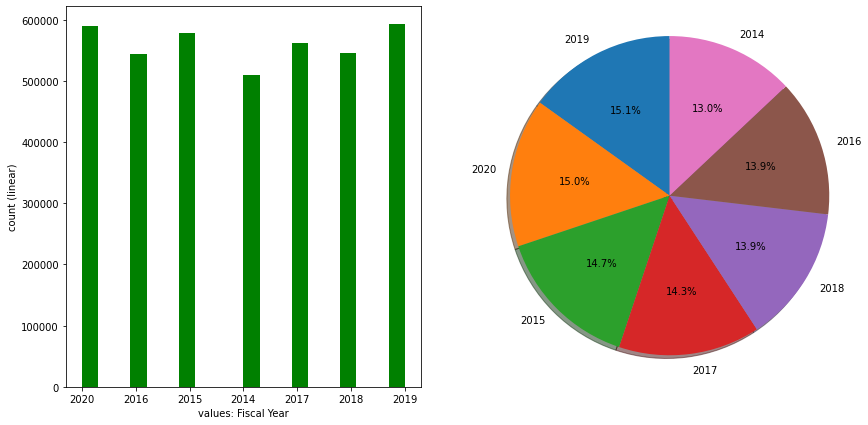

In [214]:
# fiscal_year = ds.select('Fiscal Year').distinct()

# for rank, val in enumerate(fiscal_year.most_common()):
#     st, freq = val
#     print(f'{rank + 1:<3} {st}  {freq:>10,}')

fiscal_year = ds_full['Fiscal Year'].value_counts()
print(fiscal_year)

fig, ax = plt.subplots(1, 2, figsize=(14,7))
log_histogram(ax[0], ds_full['Fiscal Year'], 'Fiscal Year', 'green', 20)
pie_chart(ax[1], fiscal_year.values, fiscal_year.keys().values)

## Data profiling for column "Work Location Borough"

Total 506,226 rows of work location borough were empty, and 83688 rows were with OTHER value

In our strategy, during data cleaning, we filled the work location borough with empty value by OTHER

And we also implemented data reference to check the correctness of the borough name, if the borough does not exist, it should be other

In [154]:
# work_loc = ds.select('Work Location Borough').distinct()
# for rank, val in enumerate(work_loc.most_common()):
#     st, freq = val
#     print(f'{rank + 1:<3} {st}  {freq:>10,}')

work_loc = ds_full['Work Location Borough'].value_counts()
print(work_loc)

MANHATTAN        2394979
                  506226
QUEENS            379695
BROOKLYN          323565
BRONX             177881
OTHER              83688
RICHMOND           46156
WESTCHESTER         3417
ULSTER              1953
Manhattan           1622
Bronx                935
SULLIVAN             822
Queens               660
DELAWARE             551
NASSAU               245
PUTNAM               243
SCHOHARIE            175
DUTCHESS             140
Richmond             112
ALBANY                95
GREENE                61
WASHINGTON DC         47
ORANGE                22
Name: Work Location Borough, dtype: int64


All the rows with empty work location was categorized into OTHER

It was noticed that for some categories such as Richmod, Bronx and Queens, the data representation was not in an uniformed format.

They were fixed by updating these rows with title format to upper case

MANHATTAN        2396601
OTHER             589914
QUEENS            380355
BROOKLYN          323565
BRONX             178816
RICHMOND           46268
WESTCHESTER         3417
ULSTER              1953
SULLIVAN             822
DELAWARE             551
NASSAU               245
PUTNAM               243
SCHOHARIE            175
DUTCHESS             140
ALBANY                95
GREENE                61
WASHINGTON DC         47
ORANGE                22
Name: Work Location Borough, dtype: int64


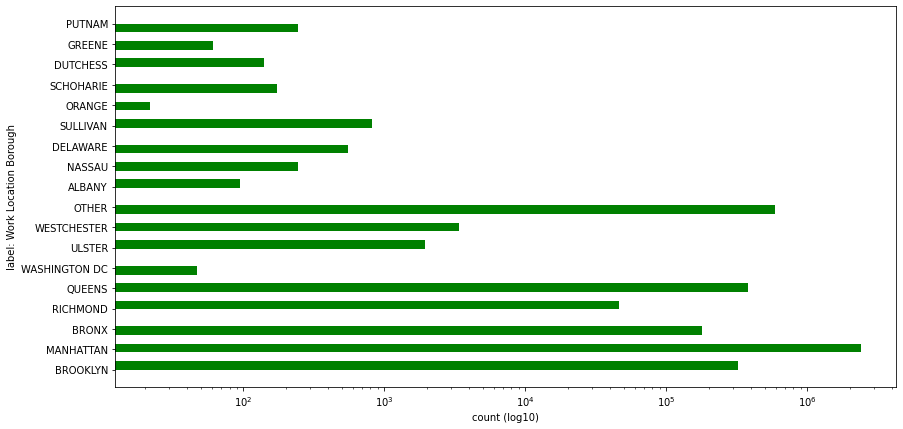

In [196]:
from openclean.function.value.null import is_empty
from openclean.operator.transform.update import update

# It was found that in original dataset, the 'Work Location Borough' col has empty values
# In our strategy, we merged these columns to OTHER category
# It was also noticed that there were some values with title case, we unified them with upper case

# ds = ds.update('Work Location Borough', str.upper).update('Work Location Borough', lambda x: 'OTHER' if is_empty(x) else x)
# work_loc = ds.select('Work Location Borough').distinct()

# print("Total {0} work locations".format(len(work_loc)))
# for rank, val in enumerate(work_loc.most_common()):
#     st, freq = val
#     print(f'{rank + 1:<3} {st}  {freq:>10,}')

ds_full = update(ds_full, columns='Work Location Borough', func=str.upper)
ds_full = update(ds_full, columns='Work Location Borough', func=lambda x: 'OTHER' if is_empty(x) else x)
work_loc = ds_full['Work Location Borough'].value_counts()

print(work_loc)

fig, ax = plt.subplots(1, 1, figsize=(14,7))
log_histogram_inverse(ax, ds_full['Work Location Borough'], 'Work Location Borough', 'green', 40)

## Data profiling for column "Title Description"

Same as column 'Work Location Borough', according to the stats, and also some titles were not in upper case.

There are also 84 rows in 'Title Description', we merged it with value 'UNKNOWN' and update the value with upper case

It was also noticed that for some titles, there were special characters '*' and '?' at the beginning

We cleaned these characters with strip function

In [89]:
# titles = ds.distinct('Title Description')
# for rank, val in enumerate(titles.most_common()):
#     st, freq = val
#     print(f'{rank + 1:<3} {st}  {freq:>10,}')

titles = ds_full['Title Description'].value_counts()
print(titles)

TEACHER- PER SESSION                                            594024
TEACHER                                                         435112
ELECTION WORKER                                                 232159
ANNUAL ED PARA                                                  191944
TEACHER SPECIAL EDUCATION                                       181519
POLICE OFFICER                                                  180668
TEACHER-GENERAL ED                                               84260
CORRECTION OFFICER                                               69696
FIREFIGHTER                                                      62057
F/T SCHOOL AIDE                                                  58867
JOB TRAINING PARTICIPANT                                         55701
SUBSTITUTE ED PARA                                               51345
SANITATION WORKER                                                47151
COMMUNITY ASSOCIATE                                              40638
SCHOOL

In [135]:
import re

# ds = ds.update('Title Description', str.upper)\
# .update('Title Description', lambda x: 'UNKNOWN' if is_empty(x) else x)\
# .update('Title Description', lambda x: re.sub("^[*\?]*", "", str(x)))
# titles = ds.distinct('Title Description')
# print("Total {0} titles".format(len(titles)))
# for rank, val in enumerate(titles.most_common()):
#     st, freq = val
#     print(f'{rank + 1:<3} {st}  {freq:>10,}')

ds_full = update(ds_full, columns='Title Description', func=str.upper)
ds_full = update(ds_full, columns='Title Description', func=lambda x: 'UNKNOWN' if is_empty(x) else x)
ds_full = update(ds_full, columns='Title Description', func=lambda x: re.sub("^[*\?]*", "", str(x)))
titles = ds_full['Title Description'].value_counts()
print(titles)

TEACHER- PER SESSION                                            594024
TEACHER                                                         435112
ELECTION WORKER                                                 232159
ANNUAL ED PARA                                                  191944
TEACHER SPECIAL EDUCATION                                       181519
POLICE OFFICER                                                  180668
TEACHER-GENERAL ED                                               84260
CORRECTION OFFICER                                               69696
FIREFIGHTER                                                      62057
F/T SCHOOL AIDE                                                  58867
JOB TRAINING PARTICIPANT                                         55701
SUBSTITUTE ED PARA                                               51345
SANITATION WORKER                                                47151
COMMUNITY ASSOCIATE                                              40638
SCHOOL

## Data profiling for column "Leave Status as of June 30"

It was noticed that there was no row for column "Leave Status as of June 30" was empty.

Hence the value counts of this column was printed.

In [87]:
# status = ds.distinct('Leave Status as of June 30')
# for rank, val in enumerate(status.most_common()):
#     st, freq = val
#     print(f'{rank + 1:<3} {st}  {freq:>10,}')

status = ds_full['Leave Status as of June 30'].value_counts()
print(status)

ACTIVE                 3355483
CEASED                  485414
ON LEAVE                 42401
SEASONAL                 33451
ON SEPARATION LEAVE       6541
Name: Leave Status as of June 30, dtype: int64


In [71]:
# for cleaning, transfer the stream to DataFrame
# df = ds.to_df()

## Data profiling for column "Payroll Number" and "Agency Name"

For some rows in column "Payroll Number", the values were missing

It was noticed that the values in column "Payroll Number" was bundled with the column "Agency Name"
Hence for the missing value in "Payroll Number", we cleaned these values according to the existing mapping values of "Agency Name"

It was noticed the representation for some agency name in the dataset was different, hence we filtered these agency names and mapped them to the agency name which was correct (with non-empty payroll number)
For payroll number without any recording, they were marked as -1

It was noticed that there were some agency names with title or lower case
Hence our strategy for column "Agency Name" was to update the name with upper case

In [139]:
payroll_dict = {}
DA_matcher = {"MANHATTAN DA": "DISTRICT ATTORNEY-MANHATTAN", "KINGS DA": "DISTRICT ATTORNEY KINGS COUNTY", "BRONX DA": "BRONX DISTRICT ATTORNEY", "QUEENS DA": "DISTRICT ATTORNEY QNS COUNTY", "SPEC NARCS-DA": "DISTRICT ATTORNEY-SPECIAL NARC", "RICHMOND DA": "DISTRICT ATTORNEY RICHMOND COU"}

ds_full = update(ds_full, columns='Agency Name', func=str.upper)
ds_full = update(ds_full, columns='Agency Name', func=lambda x: DA_matcher[str(x)] if str(x) in DA_matcher else x)

payroll_agency_map = ds_full[['Agency Name', 'Payroll Number']].value_counts()
for agency, payroll in payroll_agency_map.keys():
    if str(payroll) != "":
        payroll_dict[agency] = payroll

def match_payroll(agency):
    return payroll_dict[agency] if agency in payroll_dict else -1

ds_full["Payroll Number"] = ds_full["Agency Name"].map(match_payroll)

print(ds_full[["Payroll Number", "Agency Name"]].value_counts())

Payroll Number  Agency Name                   
742             DEPT OF ED PEDAGOGICAL            758360
747             DEPT OF ED PER SESSION TEACHER    608565
56              POLICE DEPARTMENT                 423364
744             DEPT OF ED PARA PROFESSIONALS     245259
300             BOARD OF ELECTION POLL WORKERS    235235
745             DEPT OF ED HRLY SUPPORT STAFF     164165
57              FIRE DEPARTMENT                   128819
846             DEPT OF PARKS & RECREATION        117212
740             DEPARTMENT OF EDUCATION ADMIN     110936
69              HRA/DEPT OF SOCIAL SERVICES       104331
996             NYC HOUSING AUTHORITY              95132
827             DEPARTMENT OF SANITATION           92755
72              DEPARTMENT OF CORRECTION           91843
746             DEPT OF ED PER DIEM TEACHERS       90784
816             DEPT OF HEALTH/MENTAL HYGIENE      54291
67              ADMIN FOR CHILDREN'S SVCS          53268
826             DEPT OF ENVIRONMENT PROTE

In [134]:
profiles = dataset_profile(ds_full)
print(profiles.stats())

                              total    empty  distinct  uniqueness    entropy
Fiscal Year                 3923290        0         7    0.000002   2.805614
Payroll Number              3923290        0       157    0.000040   4.292806
Agency Name                 3923290        0       164    0.000042   4.305366
Last Name                   3923290     2031    157080    0.040059  14.264455
First Name                  3923290     2033     88232    0.022501  11.611521
Mid Init                    3923290  1596166        43    0.000018   4.073274
Agency Start Date           3923290       63     14933    0.003806  11.097847
Work Location Borough       3923290        0        18    0.000005   1.769786
Title Description           3923290       84      1761    0.000449   6.206232
Leave Status as of June 30  3923290        0         5    0.000001   0.710495
Base Salary                 3923290        0     98573    0.025125  10.224240
Pay Basis                   3923290        0         4    0.0000

In [7]:
import pandas as pd
from openclean_notebook import DB
db = DB(basedir='.openclean', create=True)

ds = db.load_dataset(source=ds_full, name='ds')
db.edit('ds', n=100)